In [18]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.graph_objects as go
from IPython.display import display, clear_output
from datetime import datetime, timedelta
import chocopearl as ch
import os

# DATA

### load multiple pickles

In [19]:
directory = 'C:\\Users\\cg_h2\\Documents\\JRO\\cosmic_rays\\jun2023\\'
file_paths=ch.list_files(directory)[1]

In [20]:
crs = []
i=1
for file_path in file_paths:
    with open(file_path, 'rb') as f:
        print(f'processing {os.path.basename(file_path)}')
        not_end=True
        while not_end:
            try:
                obj = pickle.load(f)
                crs.append(obj)
                #clear_output(wait=True)
                #print(f"CosmicRay: {i}")
                i+=1
            except EOFError as e:
                not_end=False
print(f'Total: {i} Cosmic Rays')

processing trails_jun2023_1_CR.pickle
processing trails_jun2023_2_CR.pickle
processing trails_jun2023_3_CR.pickle
processing trails_jun2023_4_CR.pickle
processing trails_jun2023_5_CR.pickle
processing trails_jun2023_6_CR.pickle
processing trails_jun2023_7_CR.pickle
processing trails_jun2023_8_CR.pickle
processing trails_jun2023_9_CR.pickle
Total: 16014 Cosmic Rays


### load one pickle

In [6]:
crs_path =  'C:\\Users\\cg_h2\\Documents\\JRO\\cosmic_rays\\trails_jun2023_2_CR.pickle'

In [8]:
crs = []
with open(crs_path, 'rb') as f:
    i=1
    not_end=True
    while not_end:
        try:
            obj = pickle.load(f)
            crs.append(obj)
            #clear_output(wait=True)
            #print(f"CosmicRay: {i}")
            #i+=1
        except EOFError as e:
            not_end=False

### Processing

In [39]:
timezone_shift= -5*3600       # -5horas
date= '05-08 Jun 2023'

In [40]:
timestamps=[]
range_means=[]
power_mean_dB=[]
range_all=[]
power_all_dB=[]
range_size=[]

for cr in crs:
    timestamps.append(datetime.utcfromtimestamp(cr['timestamp']) + timedelta(seconds=timezone_shift))
    range_means.append((cr['Range_start']+cr['Range_end'])/2)
    power_mean_dB.append(10*np.log10(np.mean(cr['Power_lin'])))
    range_all+=list(np.arange(cr['Range_start'],cr['Range_end']+1,1))
    range_size.append(cr['Range_end']-cr['Range_start'])
    power_all_dB+=list(cr['Power_dB'])

# PLOTS

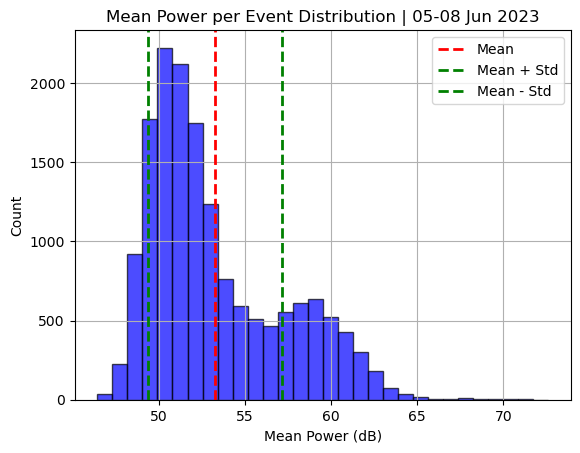

mean: 53.27502883946708
sd: 3.903689719975569


In [41]:
mean_power_event = np.mean(power_mean_dB)
std_power_event = np.std(power_mean_dB)

plt.hist(power_mean_dB, bins=30, alpha=0.7, color='b', edgecolor='black')
plt.axvline(mean_power_event, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_power_event + std_power_event, color='g', linestyle='dashed', linewidth=2, label='Mean + Std')
plt.axvline(mean_power_event - std_power_event, color='g', linestyle='dashed', linewidth=2, label='Mean - Std')

plt.title(f"Mean Power per Event Distribution | {date}")
plt.xlabel("Mean Power (dB)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)

plt.show()
print(f'mean: {mean_power_event}')
print(f'sd: {std_power_event}')

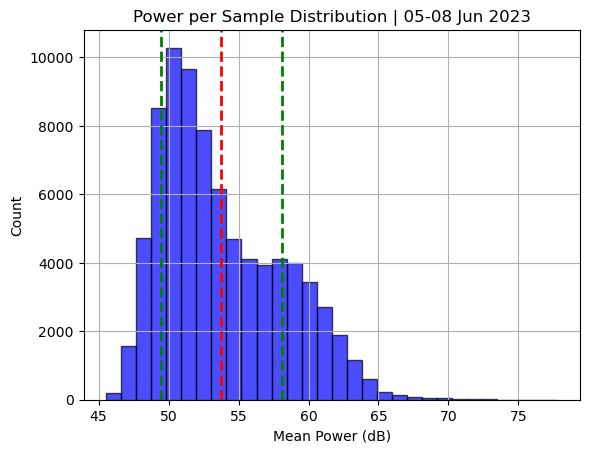

mean: 53.777249852950845 dB
sd: 4.327968591215495


In [42]:
mean_power_all=np.mean(power_all_dB)
std_power_all=np.std(power_all_dB)

plt.hist(power_all_dB, bins=30, alpha=0.7, color='b', edgecolor='black')
plt.axvline(mean_power_all, color='r', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_power_all + std_power_all, color='g', linestyle='dashed', linewidth=2, label='Mean + Std')
plt.axvline(mean_power_all - std_power_all, color='g', linestyle='dashed', linewidth=2, label='Mean - Std')

plt.title(f"Power per Sample Distribution | {date}")
plt.xlabel("Mean Power (dB)")
plt.ylabel("Count")

plt.grid(True)
plt.show()

print(f'mean: {mean_power_all} dB')
print(f'sd: {std_power_all}')

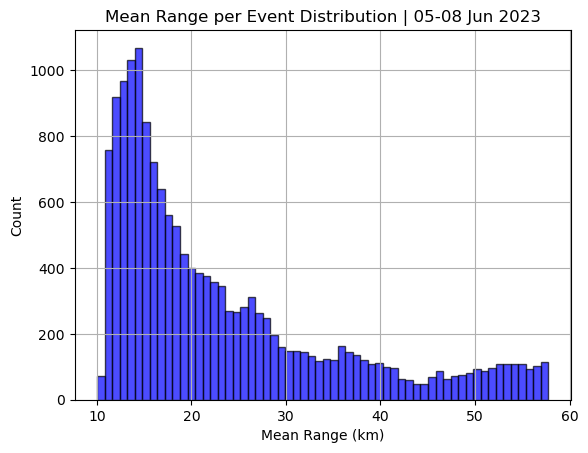

In [50]:
plt.hist(range_means,bins=60, alpha=0.7, color='b', edgecolor='black')
plt.title(f"Mean Range per Event Distribution | {date}")
plt.xlabel("Mean Range (km)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

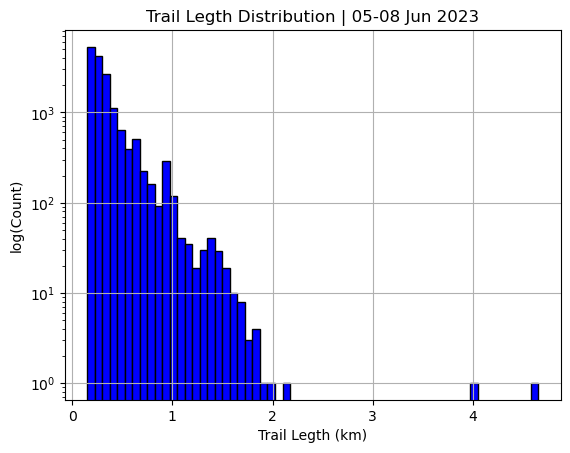

Max trail length: 4.65 km


In [51]:
plt.hist(range_size,bins=60, color='b', edgecolor='black')
plt.title(f"Trail Legth Distribution | {date}")
plt.xlabel("Trail Legth (km)")
plt.ylabel("log(Count)")
plt.grid(True)
plt.yscale('log')
plt.show()
print(f'Max trail length: {np.max(range_size):.2f} km')

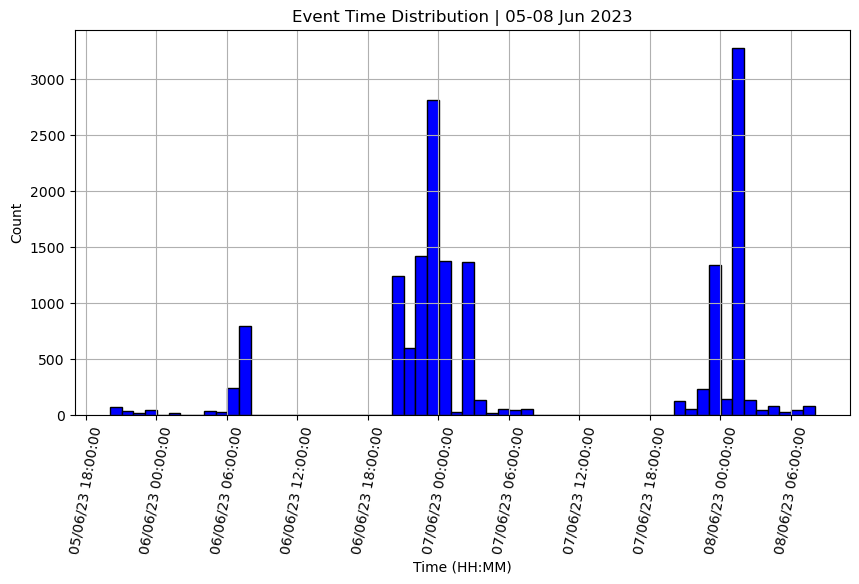

In [52]:
plt.figure(figsize=(10, 5))
plt.hist(np.array(timestamps, dtype="datetime64[s]"),bins=60, color='b', edgecolor='black')
ax = plt.gca()  # Obtener el eje actual
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d/%m/%y %H:%M:%S"))
plt.xticks(rotation=80) 
plt.title(f"Event Time Distribution | {date}")
plt.xlabel("Time (HH:MM)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

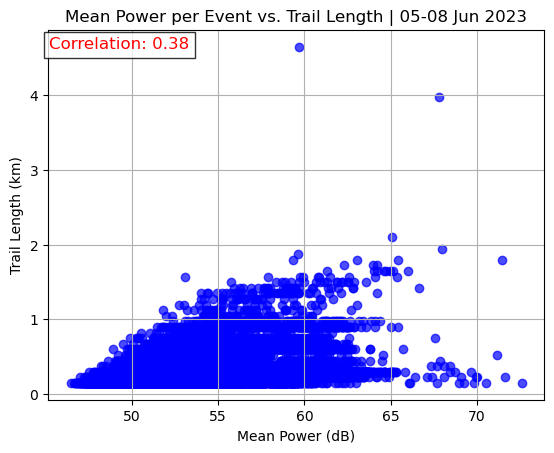

In [46]:
correlation = np.corrcoef(power_mean_dB, range_size)[0, 1]  # Calcula la correlación de Pearson

# Graficar el scatter plot
plt.scatter(power_mean_dB, range_size, color='b', alpha=0.7)
plt.title(f"Mean Power per Event vs. Trail Length | {date}")
plt.xlabel("Mean Power (dB)")
plt.ylabel("Trail Length (km)")
plt.grid(True)

plt.text(min(power_mean_dB)-1.23, max(range_size)-0.03, f"Correlation: {correlation:.2f}", 
         fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8))

plt.show()

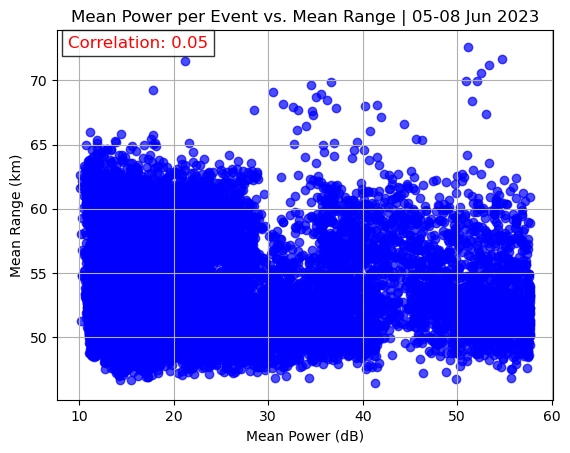

In [47]:
correlation = np.corrcoef(range_means,power_mean_dB)[0, 1]  # Calcula la correlación de Pearson

# Graficar el scatter plot
plt.scatter(range_means,power_mean_dB, color='b', alpha=0.7)
plt.title(f"Mean Power per Event vs. Mean Range | {date}")
plt.xlabel("Mean Power (dB)")
plt.ylabel("Mean Range (km)")
plt.grid(True)

plt.text(min(range_means)-1.23, max(power_mean_dB)-0.03, f"Correlation: {correlation:.2f}", 
         fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.8))

plt.show()

In [14]:
['time_ID', 'timestamp', 'Range_start_ID', 'Range_end_ID', 'Range_start', 'Range_end', 'Power_dB', 
 'Power_lin', 'Matrix', 'Norm_Matrix', 'Volt_Matrices', 'Volt_profile', 'CosmicRay', 'file']

['time_ID',
 'timestamp',
 'Range_start_ID',
 'Range_end_ID',
 'Range_start',
 'Range_end',
 'Power_dB',
 'Power_lin',
 'Matrix',
 'Norm_Matrix',
 'Volt_Matrices',
 'Volt_profile',
 'CosmicRay',
 'file']